# ARVORE DE DECISÃO - DIABETES

#### BASE DE DADOS

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
col_names = ['gravida', 'glicose', 'bp', 'pele', 'insulina', 'bmi', 'pedigree', 'idade', 'label']

dados = pd.read_csv("diabetes.csv", header=1, names=col_names)
dados.head(10)

,gravida,glicose,bp,pele,insulina,bmi,pedigree,idade,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [3]:
#dividi dataset em features e variavel target
feature_cols = ['gravida', 'insulina', 'bmi', 'idade','glicose','bp','pedigree']
X = dados[feature_cols] #features
y = dados.label # target 

#### TREINAMENTO

In [4]:
# divide em treino 70% e teste 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


#### ARVORE DE DECISAO E TREINAMENTO

In [5]:
# arvore de decisão
clf = DecisionTreeClassifier()

# clf = DecisionTreeClassifier(
#     criterion="entropy",
#     class_weight="balanced",
#     max_depth=8,            
#     min_samples_leaf=20,
#     random_state=42
# )

# Treinar a árvore de decisão
clf = clf.fit(X_train,y_train)

# Prever a resposta para o conjunto de teste
y_pred = clf.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.7575757575757576


#### Otimização do desempenho da árvore de decisão

In [6]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Acuracia:",metrics.accuracy_score(y_test, y_pred))



Acuracia: 0.6883116883116883


In [7]:
print(clf.classes_)

[0 1]


#### Métricas

In [8]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1  = f1_score(y_test, y_pred, zero_division=0)


print(f"Acurácia:  {acc:.3f}")
print(f"Precisão:  {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-Score:  {f1:.3f}")


print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, digits=3))


Acurácia:  0.688
Precisão:  0.506
Recall:    0.616
F1-Score:  0.556

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.803     0.722     0.760       158
           1      0.506     0.616     0.556        73

    accuracy                          0.688       231
   macro avg      0.654     0.669     0.658       231
weighted avg      0.709     0.688     0.695       231



#### MATRIZ DE CONFUSAO

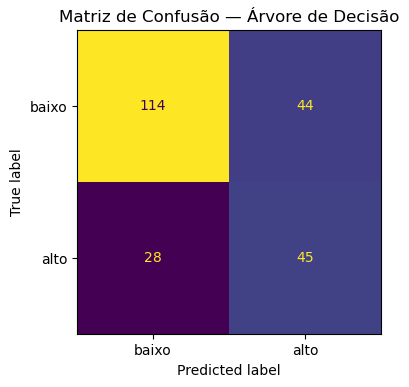

In [9]:
cm = confusion_matrix(y_test, y_pred)
labels = ['baixo','alto'] 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, values_format="d", colorbar=False)
plt.title("Matriz de Confusão — Árvore de Decisão")
plt.tight_layout()
plt.show()

#### FIGURA ARVORE DE DECISÃO

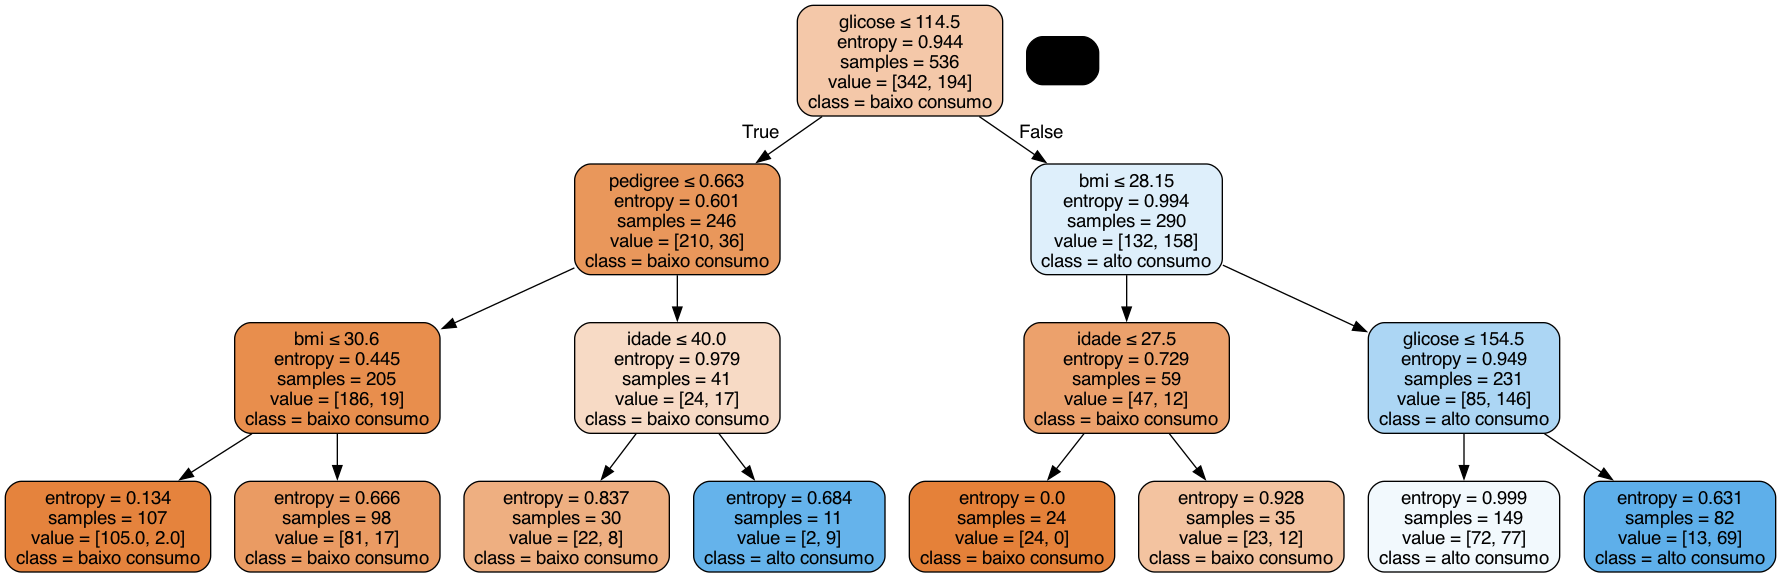

In [10]:
!pip install pydotplus graphviz

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(
    clf,                       
    out_file=dot_data,
    filled=True, rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=['baixo consumo','alto consumo']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("arvore_decisao.png")
Image(graph.create_png())


#### REGRAS

In [11]:
from sklearn.tree import export_text
rules_text = export_text(
    clf,
    feature_names=feature_cols if feature_cols is not None else None,
    decimals=2,
    show_weights=True
)
print(rules_text)

with open("regras_arvore.txt", "w", encoding="utf-8") as f:
    f.write(rules_text)
print("Regras salvas")

|--- glicose <= 114.50
|   |--- pedigree <= 0.66
|   |   |--- bmi <= 30.60
|   |   |   |--- weights: [105.00, 2.00] class: 0
|   |   |--- bmi >  30.60
|   |   |   |--- weights: [81.00, 17.00] class: 0
|   |--- pedigree >  0.66
|   |   |--- idade <= 40.00
|   |   |   |--- weights: [22.00, 8.00] class: 0
|   |   |--- idade >  40.00
|   |   |   |--- weights: [2.00, 9.00] class: 1
|--- glicose >  114.50
|   |--- bmi <= 28.15
|   |   |--- idade <= 27.50
|   |   |   |--- weights: [24.00, 0.00] class: 0
|   |   |--- idade >  27.50
|   |   |   |--- weights: [23.00, 12.00] class: 0
|   |--- bmi >  28.15
|   |   |--- glicose <= 154.50
|   |   |   |--- weights: [72.00, 77.00] class: 1
|   |   |--- glicose >  154.50
|   |   |   |--- weights: [13.00, 69.00] class: 1

Regras salvas


#### ALGORITMO RIPPER (JRip)

In [12]:
!pip install wittgenstein imbalanced-learn


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

import wittgenstein as lw



In [14]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Preenche NaN numéricos com mediana; categóricos com modo
X_train_proc = X_train.copy()
X_test_proc  = X_test.copy()

for col in X_train_proc.columns:
    if pd.api.types.is_numeric_dtype(X_train_proc[col]):
        med = X_train_proc[col].median()
        X_train_proc[col] = X_train_proc[col].fillna(med)
        X_test_proc[col]  = X_test_proc[col].fillna(med)
    else:
        mode = X_train_proc[col].mode(dropna=True)
        fill = mode.iloc[0] if len(mode) else "NA"
        X_train_proc[col] = X_train_proc[col].fillna(fill)
        X_test_proc[col]  = X_test_proc[col].fillna(fill)

pos_cl = 1 

df_train = X_train_proc.copy()
df_train["__target__"] = y_train.values

ripper = lw.RIPPER(random_state=RANDOM_STATE)
ripper.fit(df_train, class_feat="__target__", pos_class=pos_cl)

print(" REGRAS APRENDIDAS - RIPPER ")
print(ripper.ruleset_.out_pretty())

 REGRAS APRENDIDAS - RIPPER 
[[glicose=>171.0 ^ insulina=145.0-210.0] V
[bmi=>40.85 ^ insulina=<39.0 ^ bp=>88.0] V
[glicose=>171.0 ^ idade=23.0-25.0] V
[glicose=>171.0 ^ insulina=>210.0] V
[glicose=150.0-171.0 ^ gravida=7.0-9.0] V
[idade=32.0-38.0 ^ gravida=<1.0] V
[glicose=150.0-171.0 ^ gravida=2.0-3.0] V
[glicose=>171.0 ^ idade=38.0-42.0] V
[pedigree=>0.84 ^ gravida=3.0-4.0] V
[bmi=32.4-34.0 ^ glicose=110.0-118.0 ^ insulina=<39.0] V
[glicose=150.0-171.0 ^ bmi=30.3-32.4]]
None


Acurácia:  0.723
Precisão:  0.680
Recall:    0.233
F1-Score:  0.347

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.728     0.949     0.824       158
           1      0.680     0.233     0.347        73

    accuracy                          0.723       231
   macro avg      0.704     0.591     0.586       231
weighted avg      0.713     0.723     0.673       231



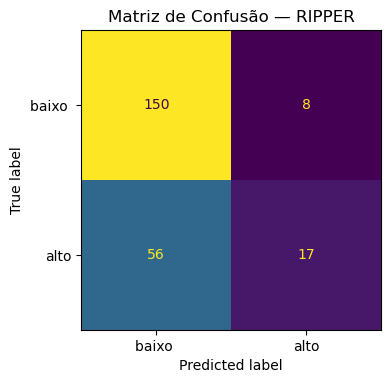

In [15]:
y_pred = ripper.predict(X_test_proc)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1  = f1_score(y_test, y_pred, zero_division=0)

print(f"Acurácia:  {acc:.3f}")
print(f"Precisão:  {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-Score:  {f1:.3f}\n")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["baixo ","alto"])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, values_format="d", colorbar=False)
plt.title("Matriz de Confusão — RIPPER")
plt.tight_layout()
plt.show()
